# DSCI 503 – Project 03
### Krupa Jacob

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

## Part 1: Loading the Dataset; Preliminary Analysis
In this section of the project the data is loaded onto the dataframe and the structure of the dataset is explored

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

diamonds = pd.read_csv("diamonds.txt", delimiter='\t')

print(diamonds.head(10))

    carat        cut color clarity  depth  table  price     x     y     z
1    0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3    0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
8    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


We will determine the size of the dataset

In [3]:
print(diamonds.shape)

(53940, 10)


The following cell will now inspect the distribution of columns in the dataset diamonds

In [4]:
description = diamonds.describe()
print(description)

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


## Part 2: Filtering and Sorting
Information regarding the dataset diamonds is displayed through using filtering and sorting techniques

In [5]:
diamonds_subset = diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=False).head()
print(diamonds_subset)

       price  carat        cut color clarity
27750  18823   2.29    Premium     I     VS2
27749  18818   2.00  Very Good     G     SI1
27748  18806   1.51      Ideal     G      IF
27747  18804   2.07      Ideal     G     SI2
27746  18803   2.00  Very Good     H     SI1


We will now view information about the 5 least expensive diamonds in the dataset

In [6]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price').head()

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


We will now view information about the 5 largest diamonds in the dataset with an 
ideal cut.  

In [7]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Ideal'].sort_values(by='carat', ascending=False).head()

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


We will now view information about the 5 largest diamonds in the dataset with an 
fair cut.

In [8]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Fair'].sort_values(by='carat', ascending=False).head()

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
In this part of the project we will be creating lists to specify the order for each of the three categorical variables.

In [9]:

clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

We will now use these lists to communicate to Pandas the correct order for the 
levels of the three categorical variables. 

In [10]:

diamonds['cut'] = pd.Categorical(diamonds['cut'], ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

diamonds['color'] = pd.Categorical(diamonds['color'], ['J', 'I', 'H', 'G', 'F', 'E', 'D'])

diamonds['clarity'] = pd.Categorical(diamonds['clarity'], ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

We will now create lists of named colors to serve as palettes to be used for 
visualizations later in the notebook.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Number of levels for each categorical variable
num_clarity_levels = len(clarity_levels)
num_color_levels = len(color_levels)
num_cut_levels = len(cut_levels)

# Create color palettes
clarity_pal = plt.cm.tab10(range(num_clarity_levels))
color_pal = plt.cm.tab10(range(num_color_levels))
cut_pal = plt.cm.tab10(range(num_cut_levels))

# Convert RGBA values to color names
clarity_pal = [mcolors.to_hex(color) for color in clarity_pal]
color_pal = [mcolors.to_hex(color) for color in color_pal]
cut_pal = [mcolors.to_hex(color) for color in cut_pal]

## Part 4: Displaying Counts for Categorical Variables
In this part of the project we will start by counting the number of diamonds for each level of cut

In [12]:
diamonds['cut'].value_counts().sort_index()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

We will now count the number of diamonds for each level of color

In [13]:
diamonds['color'].value_counts().sort_index()

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

We will now count the number of diamonds for each level of clarity.  

In [14]:
diamonds['clarity'].value_counts().sort_index()

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat
In this part of the project we will explore the relationship between the price and carat attributes by generating scatter plots

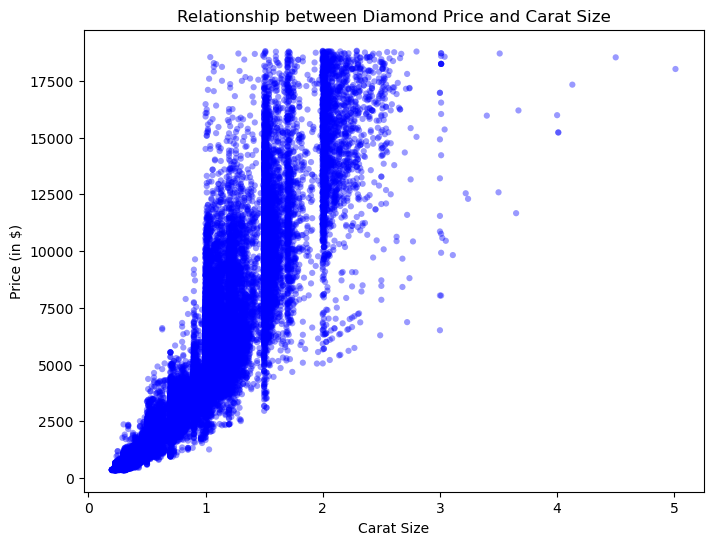

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])

plt.scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.4, color='blue', edgecolor='None')

plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')

plt.show()

We will now reproduce the plot from above, but will now color the points according to 
their clarity. 

In [16]:
import matplotlib.pyplot as plt
bb
plt.figure(figsize=[8, 6])

for i, clarity_level in enumerate(clarity_levels):
    clarity_mask = diamonds['clarity'] == clarity_level
    plt.scatter(diamonds[clarity_mask]['carat'], diamonds[clarity_mask]['price'], s=20, alpha=0.4, label=clarity_level, color=clarity_pal[i], edgecolor='None')

plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')

plt.legend(title='Clarity')

plt.show()

NameError: name 'bb' is not defined

We will now separate the points for each of the eight clarity levels into its own 
subplot.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 6])

for i, clarity_level in enumerate(clarity_levels):

    plt.subplot(2, 4, i+1)
    
    clarity_mask = diamonds['clarity'] == clarity_level
    
    plt.scatter(diamonds[clarity_mask]['carat'], diamonds[clarity_mask]['price'], s=20, alpha=0.4, color=clarity_pal[i], edgecolor='None')
    
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(clarity_level)
    
    plt.xlim(0, 4)
    plt.ylim(0, 20000)

plt.tight_layout()

plt.show()

## Part 6: Applying Logarithmic Transformations
In this part of the project, we will add two new columns to the diamonds in order to store the transformed variables.

In [ ]:
import numpy as np

diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

We will now use histograms to explore the distribution of the diamond prices, and 
the log of the diamond prices

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.hist(diamonds['price'], bins=20, edgecolor='black', color='blue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_price'], bins=20, edgecolor='black', color='red')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of Log-Prices')

plt.tight_layout()

plt.show()

We will now use histograms to explore the distribution of the carat sizes, and the 
log of the carat sizes.  

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.hist(diamonds['carat'], bins=20, edgecolor='black', color='green')
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Sizes')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_carat'], bins=20, edgecolor='black', color='orange')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Log-Carat Sizes')

plt.tight_layout()

plt.show()

## Part 7: Scatterplot of Transformed Variables
In this part of the project, a scatterplot of ln_price against ln_carat, with points colored according to their 
clarity is created

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])

for i, clarity_level in enumerate(clarity_levels):
    clarity_mask = diamonds['clarity'] == clarity_level
    plt.scatter(diamonds[clarity_mask]['ln_carat'], diamonds[clarity_mask]['ln_price'], s=20, alpha=0.4, label=clarity_level, color=clarity_pal[i], edgecolor='None')

plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')

plt.legend(title='Clarity')

plt.show()

## Part 8: Grouping by Cut
In this part of the project, a grouped DataFrame displaying the mean price and carat size for each cut level.  

In [ ]:
diamonds['cut'] = diamonds['cut'].astype(str)

gb_cut = diamonds.groupby('cut')[['price', 'carat']].mean()

print(gb_cut)

We will now use bar charts to graphically display the information from the 
DataFrame above

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, gb_cut['price'], color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')

plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, gb_cut['carat'], color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')

plt.tight_layout()

plt.show()

## Part 10: Grouping by Clarity
In this part of the project, we will create a grouped DataFrame displaying the mean price and carat size for each clarity level. 

In [ ]:
gb_clarity = diamonds.groupby('clarity')[['price', 'carat']].mean()

print(gb_clarity)

We will now use bar charts to graphically display the information from the 
DataFrame above.  

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_clarity.index, gb_clarity['price'], color=clarity_pal, edgecolor='black')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.title('Mean Price by Clarity')

plt.subplot(1, 2, 2)
plt.bar(gb_clarity.index, gb_clarity['carat'], color=clarity_pal, edgecolor='black')
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Clarity')

plt.tight_layout()

plt.show()